In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("car-mpg.csv")

# Drop unwanted column
df = df.drop("car_name", axis=1)
print(df)

      mpg  cyl   disp   hp    wt   acc  yr  origin  car_type
0    18.0    8  307.0  130  3504  12.0  70       1         0
1    15.0    8  350.0  165  3693  11.5  70       1         0
2    18.0    8  318.0  150  3436  11.0  70       1         0
3    16.0    8  304.0  150  3433  12.0  70       1         0
4    17.0    8  302.0  140  3449  10.5  70       1         0
..    ...  ...    ...  ...   ...   ...  ..     ...       ...
393  27.0    4  140.0   86  2790  15.6  82       1         1
394  44.0    4   97.0   52  2130  24.6  82       2         1
395  32.0    4  135.0   84  2295  11.6  82       1         1
396  28.0    4  120.0   79  2625  18.6  82       1         1
397  31.0    4  119.0   82  2720  19.4  82       1         1

[398 rows x 9 columns]


In [5]:
df["hp"] = pd.to_numeric(df["hp"], errors="coerce")
median_value = df["hp"].median()
df["hp"] = df["hp"].fillna(median_value)

In [6]:
df.head(358)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
353,33.0,4,105.0,74.0,2190,14.2,81,2,1
354,34.5,4,100.0,93.5,2320,15.8,81,2,1
355,33.7,4,107.0,75.0,2210,14.4,81,3,1
356,32.4,4,108.0,75.0,2350,16.8,81,3,1


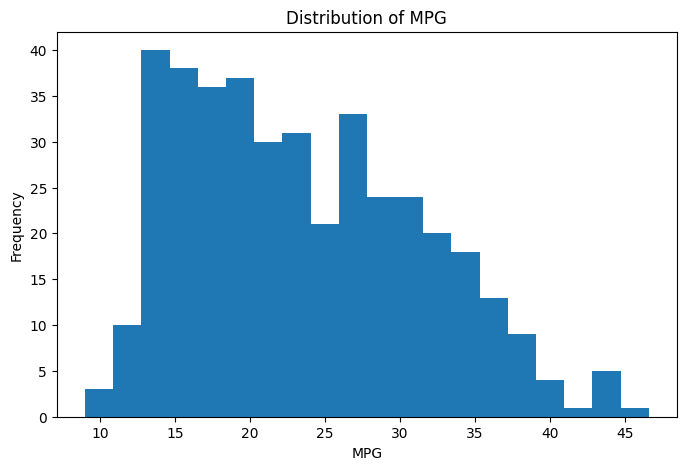

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(df['mpg'], bins=20)
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Distribution of MPG')
plt.show()

Most cars → 15–25 MPG
Few cars → above 35 MPG
Distribution → right-skewed (more low MPG cars than high MPG cars)
High and low MPG values are less common

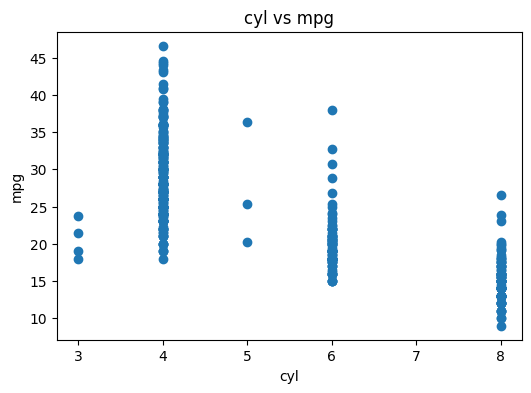

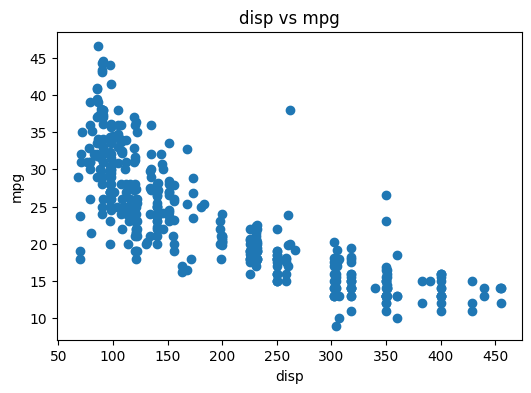

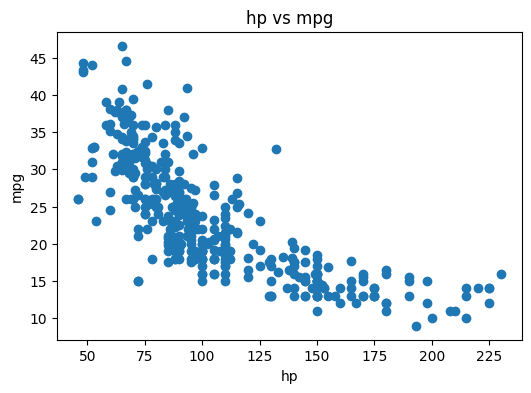

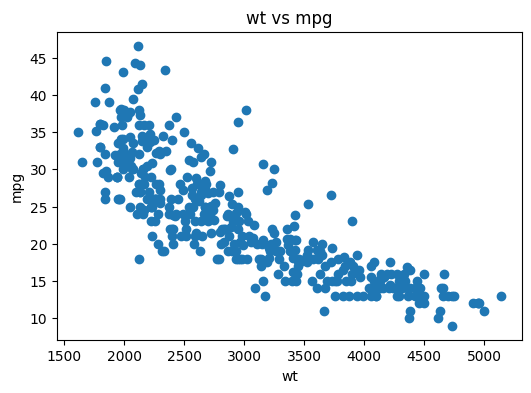

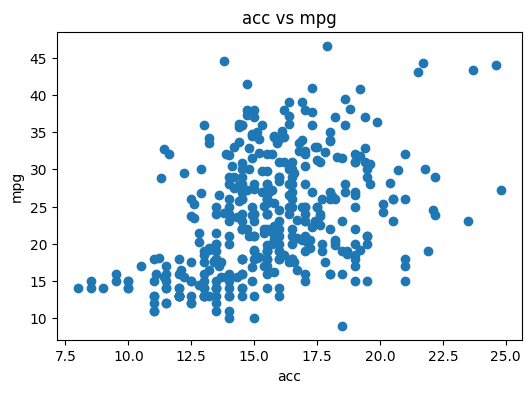

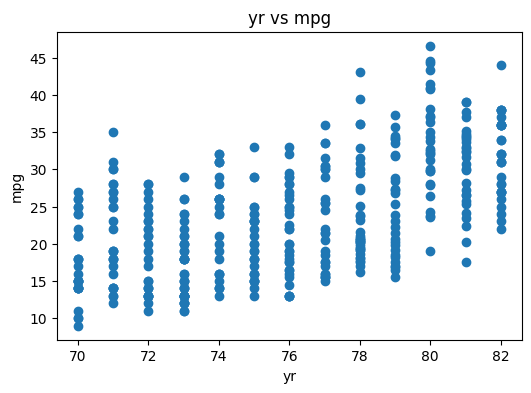

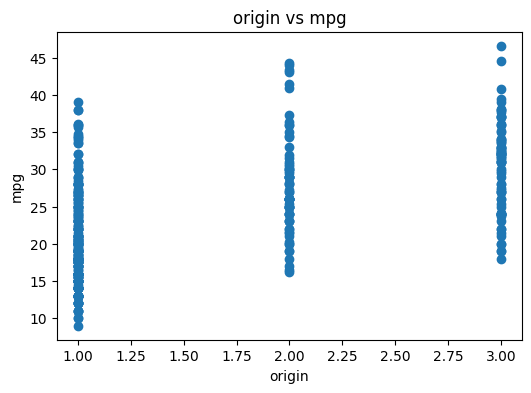

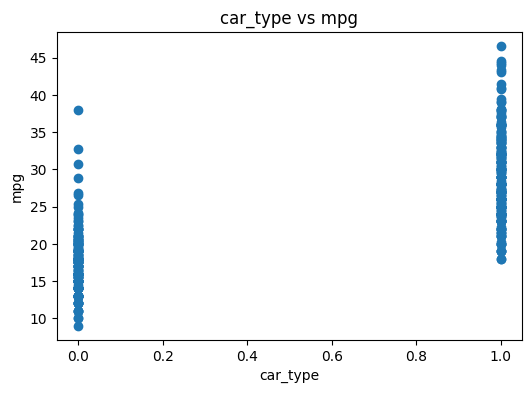

In [8]:
import matplotlib.pyplot as plt

# y variable
y = 'mpg'

# remove y from list of columns
x_columns = [col for col in df.columns if col != y]

# loop to draw scatter plots
for col in x_columns:
    plt.figure(figsize=(6,4))
    plt.scatter(df[col], df[y])
    plt.xlabel(col)
    plt.ylabel(y)
    plt.title(f'{col} vs {y}')
    plt.show()


Cars with more cylinders have lower MPG, and cars with fewer cylinders have higher MPG.
As engine displacement increases, MPG decreases, meaning bigger engines give lower fuel efficiency.
As horsepower increases, MPG decreases, meaning powerful engines use more fu
Most of the cars are heavy (3000–4500 lbs range).Very lightweight cars (1500–2200 lbs) are fewer.   
This scatter plot shows a moderate positive correlation between the two variables
This scatter plot shows how a car’s **miles per gallon (mpg)** varies across different **model years**, with mpg generally increasing in newer years.
This scatter plot shows how mpg varies for cars made in different origin regions (1, 2, and 3).
This scatter plot shows how **mpg differs between two car types (0 and 1)**, with type 1 generally having higher mpg.  

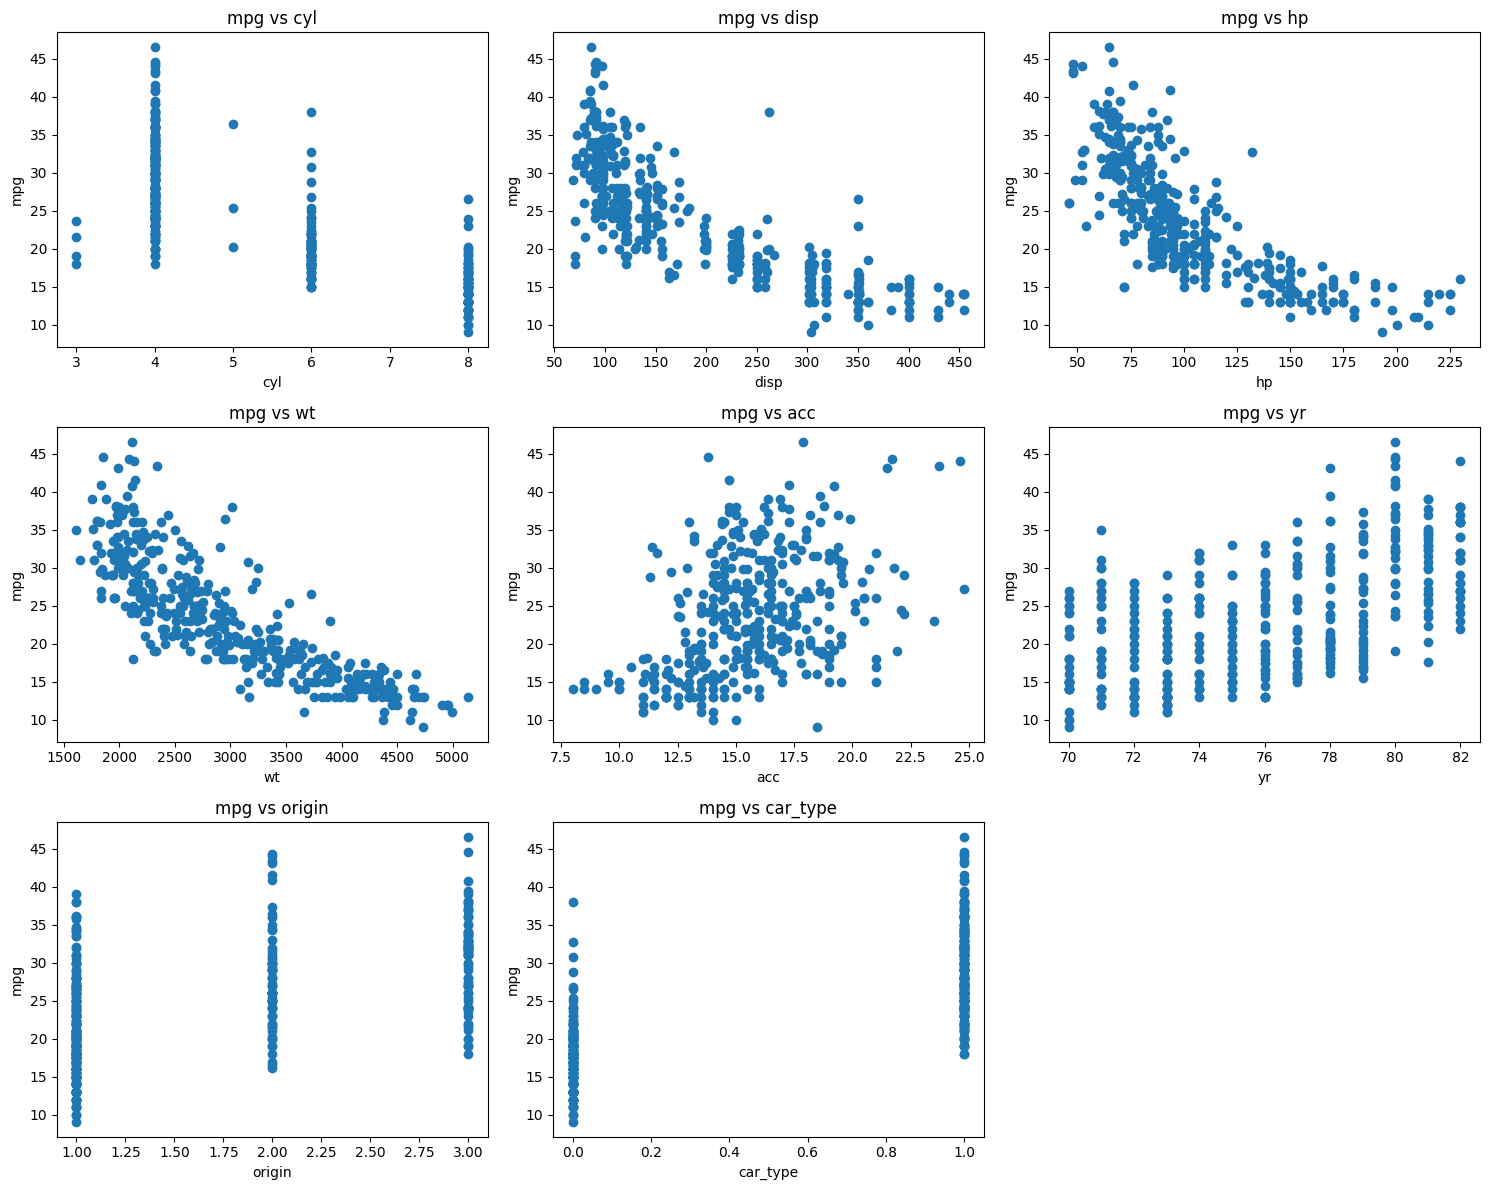

In [9]:
# target variable
y = df["mpg"]

# features (all except mpg)
X = df.drop("mpg", axis=1)

plt.figure(figsize=(15, 12))

# loop through each column and make subplots
for i, col in enumerate(X.columns):
    plt.subplot(3, 3, i + 1)      # adjust grid size (3x3 for 8 columns)
    plt.scatter(df[col], y)
    plt.xlabel(col)
    plt.ylabel("mpg")
    plt.title(f"mpg vs {col}")

plt.tight_layout()
plt.show()

In [10]:
corr = df.corr()
print(corr)


               mpg       cyl      disp        hp        wt       acc  \
mpg       1.000000 -0.775396 -0.804203 -0.773453 -0.831741  0.420289   
cyl      -0.775396  1.000000  0.950721  0.841284  0.896017 -0.505419   
disp     -0.804203  0.950721  1.000000  0.895778  0.932824 -0.543684   
hp       -0.773453  0.841284  0.895778  1.000000  0.862442 -0.686590   
wt       -0.831741  0.896017  0.932824  0.862442  1.000000 -0.417457   
acc       0.420289 -0.505419 -0.543684 -0.686590 -0.417457  1.000000   
yr        0.579267 -0.348746 -0.370164 -0.413733 -0.306564  0.288137   
origin    0.563450 -0.562543 -0.609409 -0.452096 -0.581024  0.205873   
car_type  0.759207 -0.912577 -0.855141 -0.701399 -0.815445  0.385187   

                yr    origin  car_type  
mpg       0.579267  0.563450  0.759207  
cyl      -0.348746 -0.562543 -0.912577  
disp     -0.370164 -0.609409 -0.855141  
hp       -0.413733 -0.452096 -0.701399  
wt       -0.306564 -0.581024 -0.815445  
acc       0.288137  0.205873  0.3

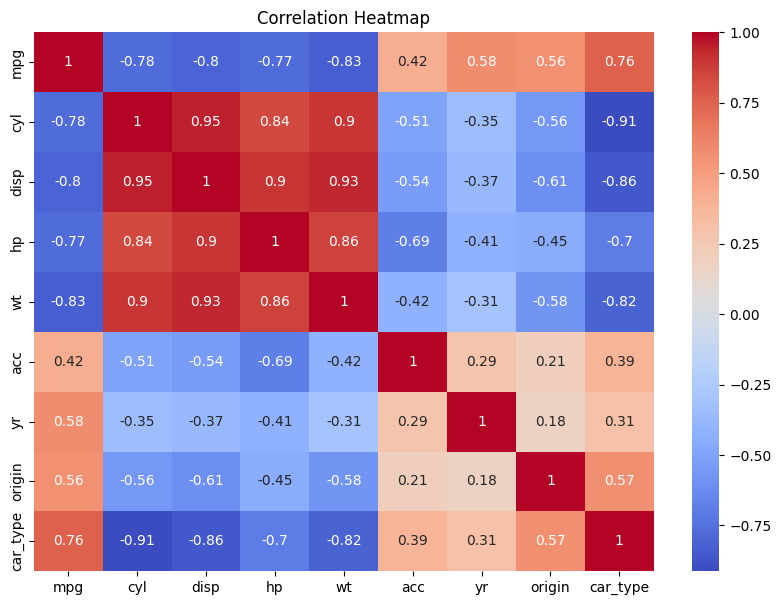

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

mpg is strongly negatively correlated with cyl, disp, hp, and wt — meaning bigger/heavier engines give lower mileage.
mpg is positively correlated with yr and car_type — newer and efficient car types give better mileage.
Many engine measurements (cyl, disp, hp, wt) are strongly correlated with each other, showing multicollinearity.

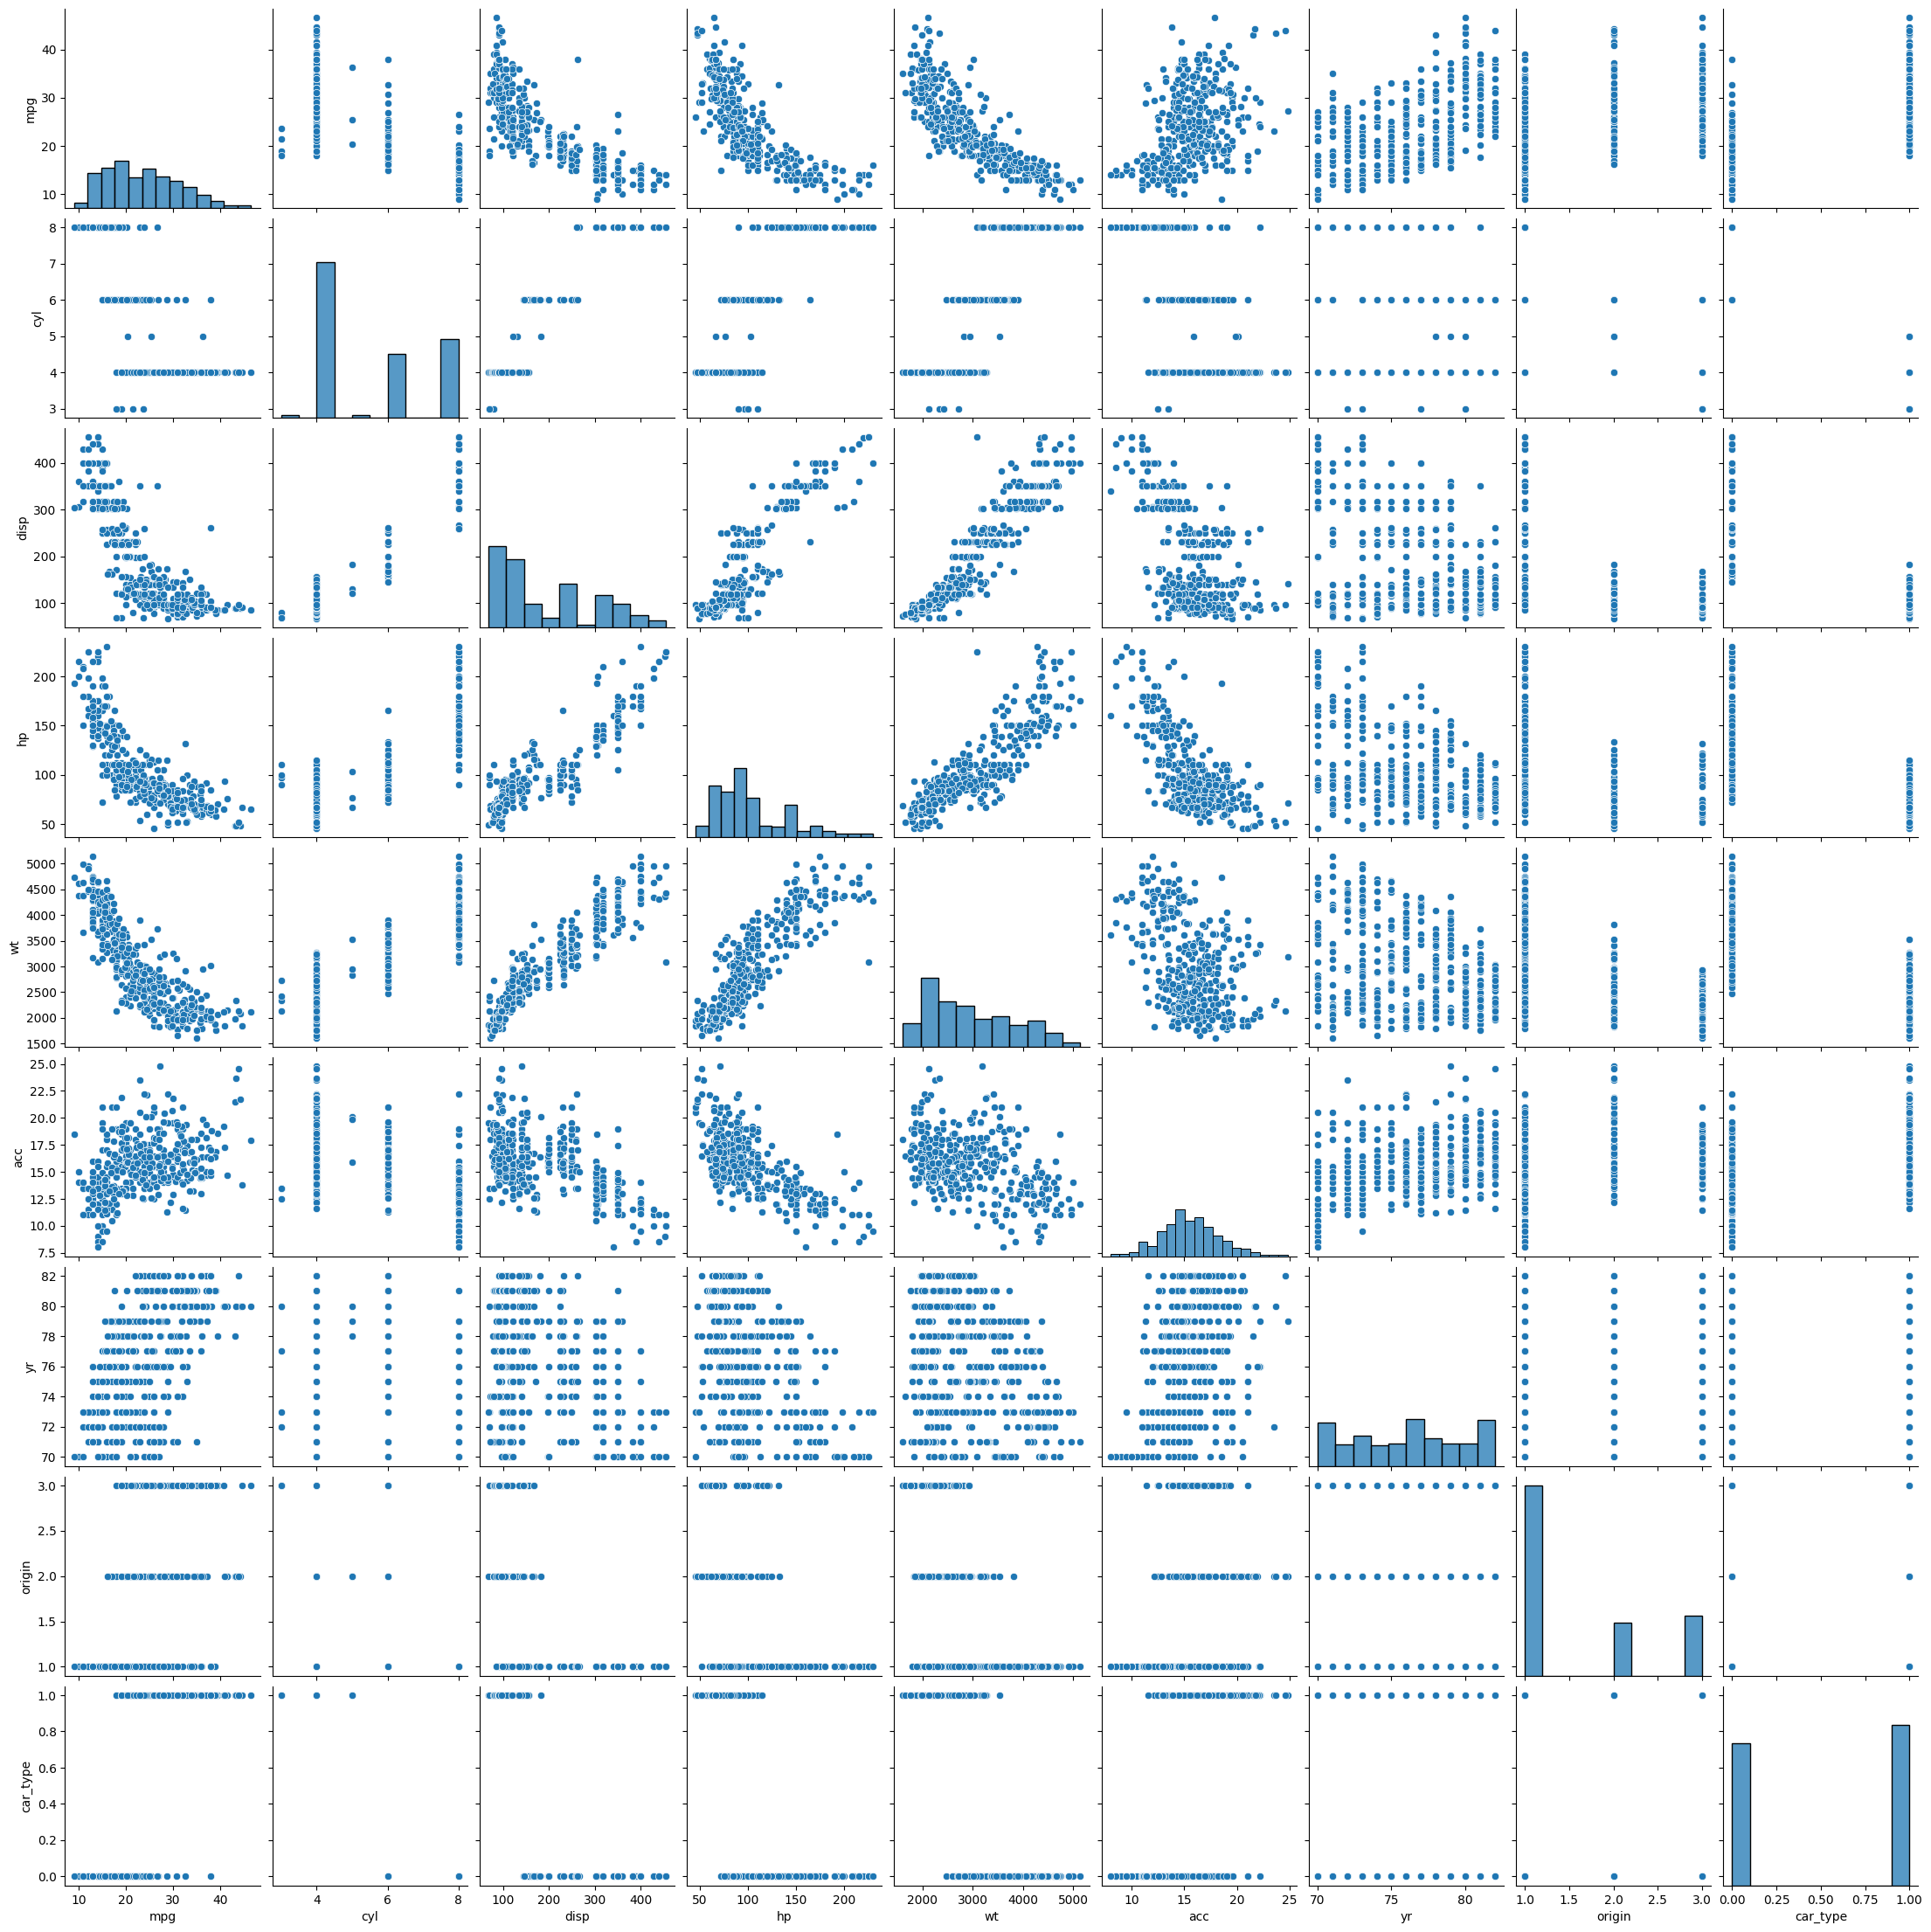

In [12]:
sns.pairplot(df)
plt.show()

The pairplot shows how each feature in the dataset is related to every other feature using scatterplots and histograms.
Mileage (mpg) decreases when engine size, horsepower, or weight increases, showing strong negative correlations.
Engine-related features like displacement, horsepower, and weight are strongly positively correlated with each other.

In [13]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
Scaler = StandardScaler()
Scaler_data=Scaler.fit_transform(df)
print(Scaler_data)

[[-0.7064387   1.49819126  1.0906037  ... -1.62742629 -0.71514478
  -1.06223455]
 [-1.09075062  1.49819126  1.5035143  ... -1.62742629 -0.71514478
  -1.06223455]
 [-0.7064387   1.49819126  1.19623199 ... -1.62742629 -0.71514478
  -1.06223455]
 ...
 [ 1.08701694 -0.85632057 -0.56103873 ...  1.62198339 -0.71514478
   0.94141167]
 [ 0.57460104 -0.85632057 -0.70507731 ...  1.62198339 -0.71514478
   0.94141167]
 [ 0.95891297 -0.85632057 -0.71467988 ...  1.62198339 -0.71514478
   0.94141167]]


In [14]:
data=pd.DataFrame(Scaler_data)
print(data)

            0         1         2         3         4         5         6  \
0   -0.706439  1.498191  1.090604  0.673118  0.630870 -1.295498 -1.627426   
1   -1.090751  1.498191  1.503514  1.589958  0.854333 -1.477038 -1.627426   
2   -0.706439  1.498191  1.196232  1.197027  0.550470 -1.658577 -1.627426   
3   -0.962647  1.498191  1.061796  1.197027  0.546923 -1.295498 -1.627426   
4   -0.834543  1.498191  1.042591  0.935072  0.565841 -1.840117 -1.627426   
..        ...       ...       ...       ...       ...       ...       ...   
393  0.446497 -0.856321 -0.513026 -0.479482 -0.213324  0.011586  1.621983   
394  2.624265 -0.856321 -0.925936 -1.370127 -0.993671  3.279296  1.621983   
395  1.087017 -0.856321 -0.561039 -0.531873 -0.798585 -1.440730  1.621983   
396  0.574601 -0.856321 -0.705077 -0.662850 -0.408411  1.100822  1.621983   
397  0.958913 -0.856321 -0.714680 -0.584264 -0.296088  1.391285  1.621983   

            7         8  
0   -0.715145 -1.062235  
1   -0.715145 -1.062235

In [15]:
X=df.drop(columns="mpg",axis=1)

In [16]:
y=df["mpg"]

In [17]:
!pip install scikit-learn

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# random_state=seed value -ensure randomazation
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [21]:
model= LinearRegression()
# fit the model
model.fit(X_train, y_train)
# predict
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)
# score (R²)
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print("Train R2 score:", train_score)
print("Test R2 score:", test_score)

Train R2 score: 0.8304965203706635
Test R2 score: 0.866835390525402


In [22]:
#this is mx+c formula oda c value
print(model.intercept_)

-29.069694504726048


In [23]:
#this is mx1 value then run loop
print(model.coef_[0])

1.434912286775164


In [24]:
for feature,coef in zip(X.columns,model.coef_):
    print(f'{feature}{coef}')

cyl1.434912286775164
disp0.011730634967564026
hp-0.03270209372103369
wt-0.006029356536942314
acc0.09044657598273885
yr0.7570684360450071
origin1.252534717738324
car_type5.465952958403979


In [25]:
from sklearn.metrics import mean_squared_error,r2_score
mse_train=mean_squared_error(y_train,y_train_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
print(mse_train)
print(mse_test)

10.564984221839373
7.561554732734587


In [26]:
from sklearn.metrics import mean_squared_error,r2_score
r2_train=r2_score(y_train,y_train_pred)
r2_test=r2_score(y_test,y_test_pred)
print(r2_train)
print(r2_test)

0.8304965203706635
0.866835390525402


In [27]:
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)
print(rmse_train)
print(rmse_test)

3.2503821655059846
2.749828127853555


In [28]:
#craetea a display data in datframe
result_df=pd.DataFrame(X_train)
result_df['y_train']=y_train
result_df['y_train_pred']=y_train_pred
result_df

,cyl,disp,hp,wt,acc,yr,origin,car_type,y_train,y_train_pred
245,4,98.0,66.0,1800,14.4,78,1,1,36.1,31.880633
110,4,108.0,94.0,2379,16.5,73,3,1,22.0,26.500949
16,6,199.0,97.0,2774,15.5,70,1,0,18.0,17.625885
66,8,304.0,150.0,3672,11.5,72,1,0,17.0,15.732203
153,6,250.0,105.0,3459,16.0,75,1,0,18.0,17.662986
...,...,...,...,...,...,...,...,...,...,...
71,3,70.0,97.0,2330,13.5,72,3,1,19.0,23.789196
106,8,350.0,180.0,4499,12.5,73,1,0,12.0,11.151987
270,4,134.0,95.0,2515,14.8,78,3,1,21.1,29.584834
348,4,89.0,62.0,2050,17.3,81,3,1,37.7,35.437097


In [29]:
y_train_mean_value=result_df['y_train'].mean()
print(y_train_mean_value)

23.526845637583893


In [30]:
# Training the model:
from sklearn.ensemble import RandomForestRegressor

# Initialize and Train the model
model=RandomForestRegressor(random_state=42)
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False
